<a href="https://colab.research.google.com/github/geekysharzeel/Youtube_ad_view_prediction/blob/main/final_internship_studio_youtube_Ad_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow as tf
# Importing data
#path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

data_train.shape
#data=data_train
# (14999, 9)

(14999, 9)

In [51]:
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [52]:
test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [53]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)

# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [54]:
# Removing character "F" present in data
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']

# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test["category"]=test["category"].map(category)

# Convert values to integers for views, likes, comments, dislikes and adview
test["views"] = pd.to_numeric(test["views"])
test["comment"] = pd.to_numeric(test["comment"])
test["likes"] = pd.to_numeric(test["likes"])
test["dislikes"] = pd.to_numeric(test["dislikes"])

column_vidid=test['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
test['duration']=LabelEncoder().fit_transform(test['duration'])
test['vidid']=LabelEncoder().fit_transform(test['vidid'])
test['published']=LabelEncoder().fit_transform(test['published'])
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


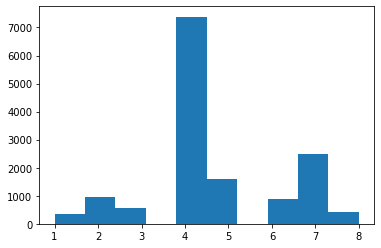

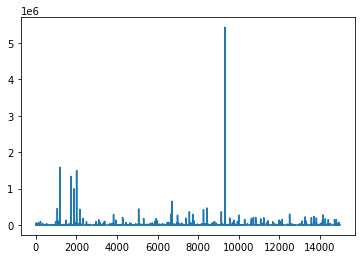

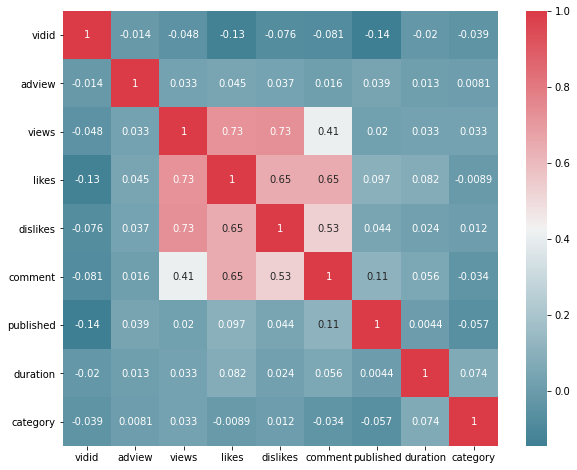

In [55]:
# Visualization
# Individual Plots

plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr =data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()


In [56]:

# Convert Time_in_sec for duration
import datetime
import time


def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
  train=pd.read_csv("train.csv")
  mp = pd.read_csv(path + "train.csv")["duration"]
  time = mp.apply(checki)
  
  def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

  time1=time.apply(func_sec)
  time2=time.apply(func_sec)
  data_train["duration"]=time1
  test["duration"]=time2
 

In [57]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [58]:
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [59]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
test_y=pd.DataFrame(test.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
test=test.drop(["vidid"],axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
test=scaler.fit_transform(test)
X_train.mean()

0.25583174881891707

In [60]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 5288.146964612727
Mean Squared Error: 10881576714.292877
Root Mean Squared Error: 104314.7962385628
Mean Absolute Error: 5288.146964612727
Mean Squared Error: 10881576714.292877
Root Mean Squared Error: 104314.7962385628


using decision tree

In [62]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth
                                      , min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 3890.254781420765
Mean Squared Error: 10547688710.503416
Root Mean Squared Error: 102701.94112334691
Mean Absolute Error: 4977.74114327475
Mean Squared Error: 10341215787.461508
Root Mean Squared Error: 101691.76853345362


In [63]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.MSE
ann.compile(optimizer=optimizer,loss=loss,metrics=['mean_absolute_error'])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767613952.0000 - mean_absolute_error: 1711.6155
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767597376.0000 - mean_absolute_error: 1712.9116
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767561152.0000 - mean_absolute_error: 1719.0442
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767508288.0000 - mean_absolute_error: 1730.5472
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767422848.0000 - mean_absolute_error: 1748.6096
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767295040.0000 - mean_absolute_error: 1776.9895
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767139392.0000 - mean_absolute_error: 1816.8424
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 766953216.0000 - mean_absolute_error: 1861.0948
Epoch 9/100
366/

In [64]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [65]:
model = joblib.load("decisiontree_youtubeadview.pkl")

In [66]:
model = keras.models.load_model("ann_youtubeadview.h5")

In [67]:
preds = model.predict(test)

In [68]:
preds = preds.tolist()
d = {'adview': preds}
pd.DataFrame(d).to_csv('predictions.csv', index=False)